# **Практика 4. Частотные таблицы. Визуализация**

[SmartLMS](https://edu.hse.ru/mod/quiz/view.php?id=1610932)

Вы работаете с датасетом который содержит информацию о значимых музеях мира:


| ПРИЗНАК |  ОПИСАНИЕ | 
| --- | --- |
| `Name`	 | название музея | 
| `City`	|  город в котором расположен музей | 
| `Country`	|  страна в которой расположен музей | 
| `Year established`	|  год основания музея | 
| `Gallery space`	|  площадь которую занимает музей (м2) | 
| `Visitors` | 	 количество посетителей в год | 

In [1]:
import pandas as pd
df = pd.read_csv('data/museums.csv')

In [7]:
kwargs = {
    "color": "skyblue",
    "edgecolor": "k"
}

## **Задание 1**
>*Укажите, какой из графиков визуализирует распределение площади, которую занимают музеи (`Gallery space`).*

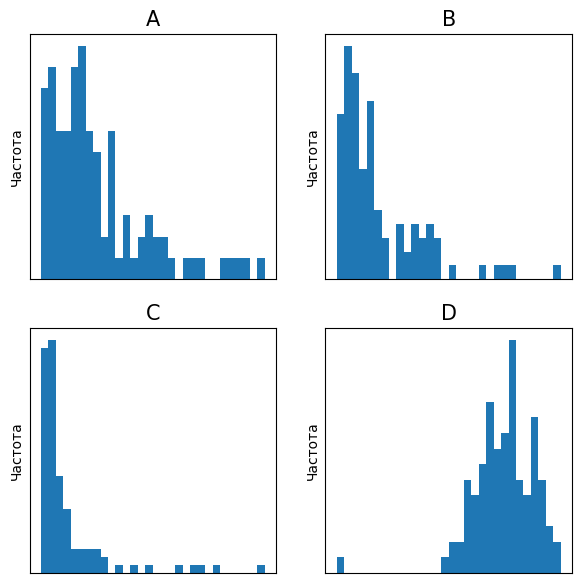

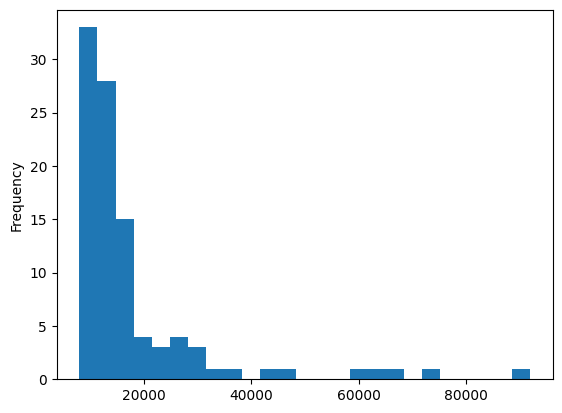

In [13]:
df["Gallery space"].plot(kind='hist', bins=25);

**Ответ**: `C`

---

## **Задание 2**
>*Укажите, какой из графиков визуализирует распределение стран (`Country`), в которых не менее 4 значимых музеев.*

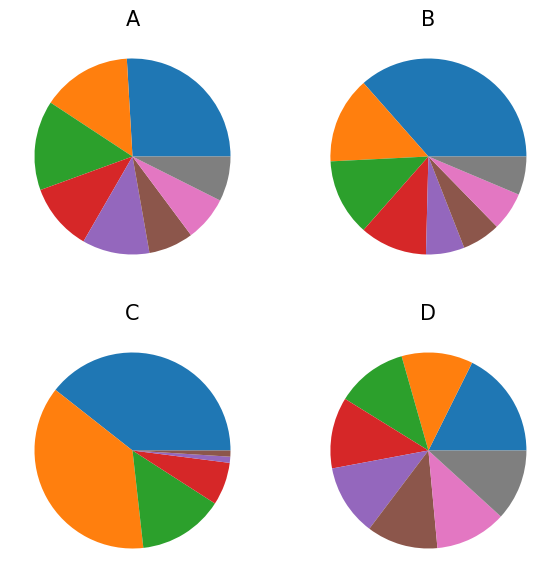

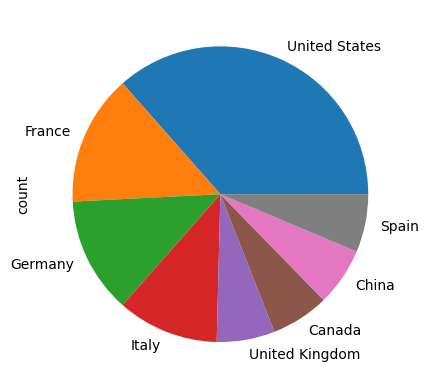

In [ ]:
df_countries = df.value_counts("Country")
df_countries[df_countries >= 4].plot(kind="pie");

**Ответ**: `B`

---

## **Задание 3**
>*Создайте новый признак век (`Century established`), на основе признака `Year established`. Логика поиска века следующая:*
>- *если год делится на 100 без остатка, то век - это целая часть от деления на 100*
>- *во всех остальных случаях, век - это целая часть от деления на 100 плюс 1*
>
>| Year established |	Century established |
>| --- | --- |
>| 1900 | 	19 | 
>| 1770 |	18 |
>| 1321 |	14 |
>
>*Укажите, какой из графиков визуализирует динамику количества открытых музеев по векам (`Century established`)*


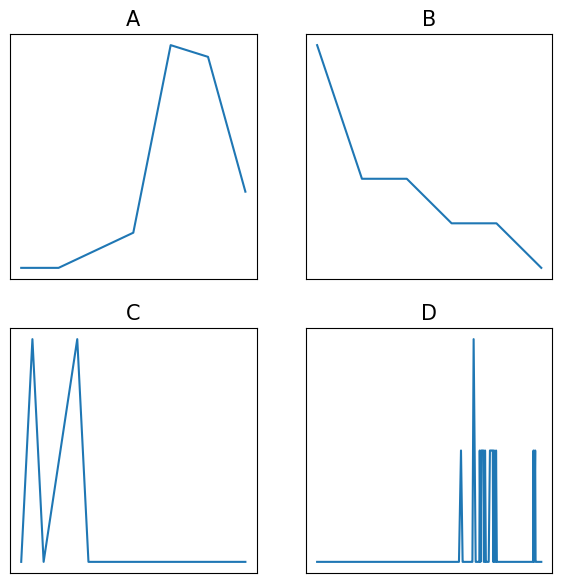

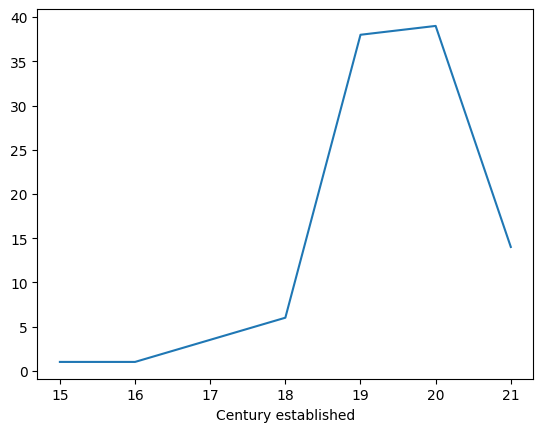

In [32]:
df["Century established"] = df["Year established"].apply(
    lambda x: x // 100 if x % 100 == 1 else x // 100 + 1
)
df["Century established"].value_counts().sort_index().plot();

**Ответ**: `A`

---

## **Задание 4**
>*Укажите, какой из графиков визуализирует распределение количества посетителей (`Visitors`), для музеев, который были открыта в век (`Century established`), когда их появлялось больше всего.*

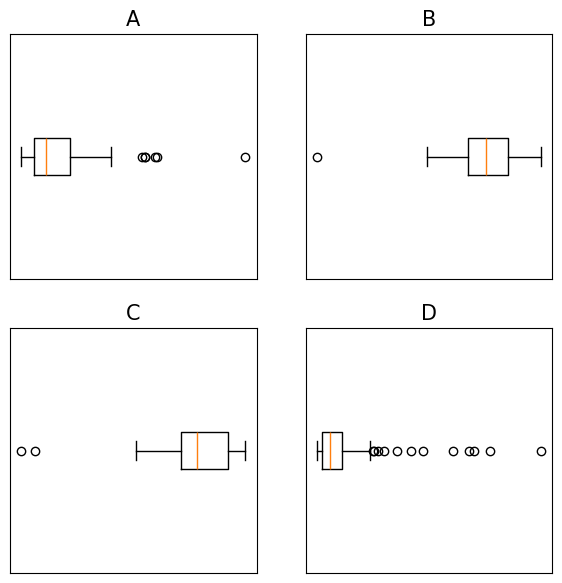

In [33]:
df['Century established'].value_counts()

Century established
20    39
19    38
21    14
18     6
16     1
15     1
Name: count, dtype: int64

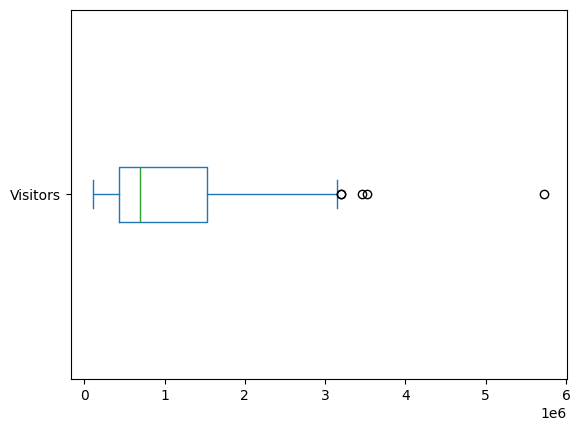

In [41]:
df[df['Century established'] == 19]['Visitors'].plot(kind='box', vert=False);

**Ответ**: `A`

---

## **Задание 5**
>*Найдите пять городов (`City`), в которых больше всего музеев. Укажите, какой из графиков визуализирует количество музеев в каждом из них.*

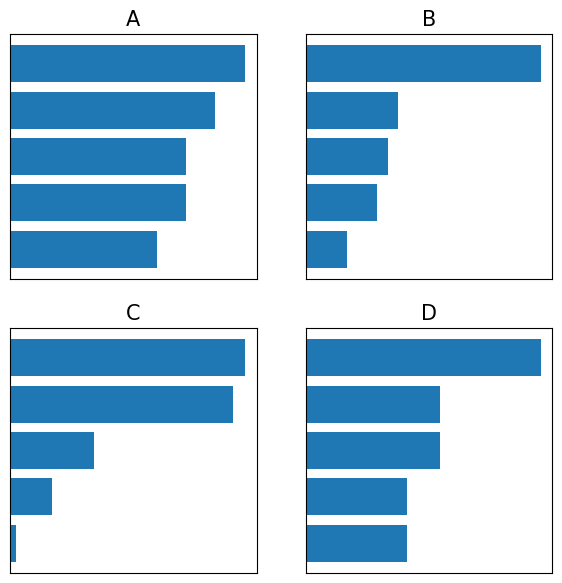

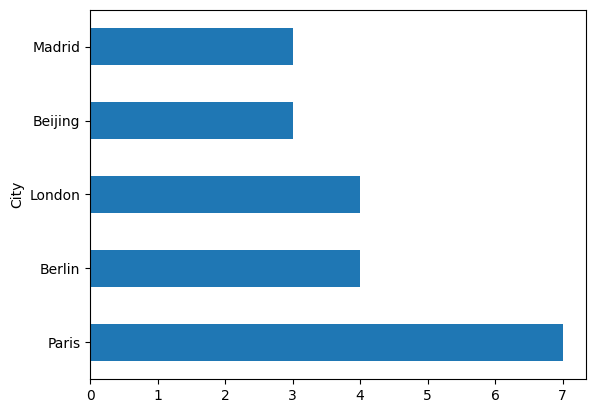

In [52]:
df.value_counts("City").sort_values(ascending=False).head(5).plot(kind="barh");

**Ответ**: `D`

---

## **Задание 6**
>*Вам предоставлен словарь `d_continents`, где ключи - это страны, а значения - часть света*
>
>*На основе словаря `d_continents` и признака `Country`, создайте новый признак `Continent`, который будет хранить информацию о том, в какой части света находится музей. Укажите, какой из графиков является визуализацией нового признака `Continent`.*

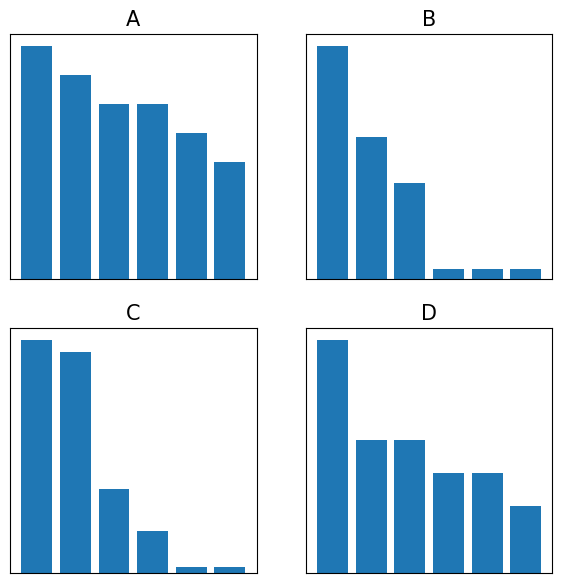

In [53]:
d_continents = {
    'United Kingdom': 'Europe', 'France': 'Europe', 
    'Russia': 'Europe', 'China': 'Asia', 'United States': 'North America', 
    'Spain': 'Europe', 'Vatican City': 'Europe', 'Japan': 'Asia',
    'Mexico': 'North America', 'Germany': 'Europe', 'Austria': 'Europe', 
    'South Korea': 'Asia', 'Ukraine': 'Europe', 'Belgium': 'Europe',
    'Canada': 'North America', 'Israel': 'Asia', 'Singapore': 'Asia', 
    'Brazil': 'South America', 'Hong Kong': 'Asia', 'Italy': 'Europe', 
    'Egypt': 'Africa', 'Taiwan': 'Asia', 'Czech Republic': 'Europe', 
    'Australia': 'Oceania', 'India': 'Asia', 'Netherlands': 'Europe', 
    'Switzerland': 'Europe', 'Hungary': 'Europe', 'Brasil': 'South America',
    'Tunisia': 'Africa', 'Norway': 'Europe', 'UAE': 'Asia', 'Greece': 'Europe'
}

<Axes: xlabel='Continent'>

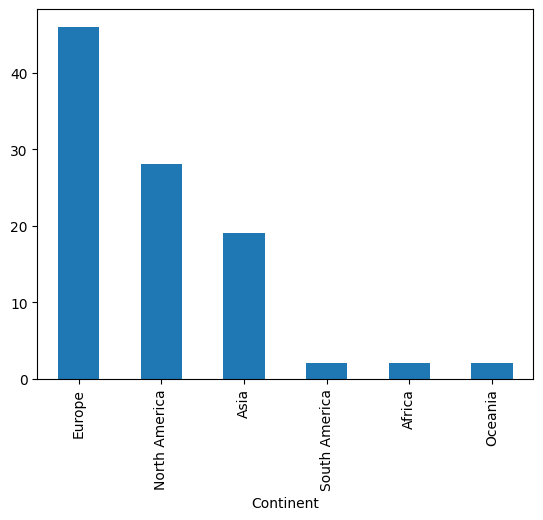

In [55]:
df['Continent'] = df['Country'].apply(lambda x: d_continents[x])
df['Continent'].value_counts().plot(kind='bar')

**Ответ**: `B`

---

## **Задание 7**
>*Постройте график зависимости признаков `Visitors` и `Gallery space`. На основе построенного графика выбери все верные утверждения.*
>- *Музей, с площадью более 80 тыс. м2 и количеством посетителей превышающим 5 млн. человек, только один*
>- *Музей с наибольшим количеством посетителей обладает при этом и наибольшей площадью*
>- *Большинство музеев, площадью до 40 тыс. м2, посещает не более 4 млн. человек в год*
>- *Не существует музеев, площадью до 60 тыс. м2, которые посещает более 6 млн. человек в год*

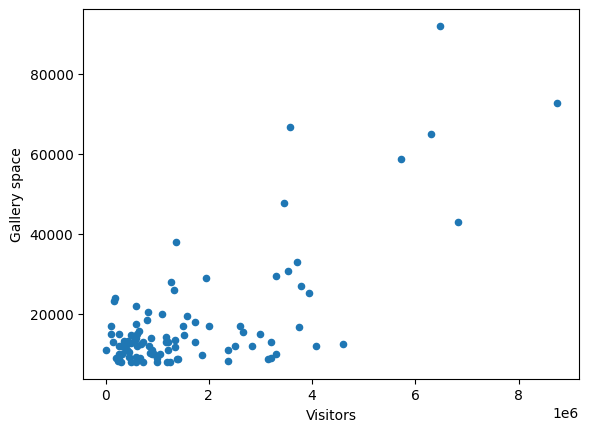

In [56]:
df.plot(x='Visitors', y='Gallery space', kind='scatter');

>- <font color='springgreen'>*Музей, с площадью более 80 тыс. м2 и количеством посетителей превышающим 5 млн. человек, только один*</font>
>- *Музей с наибольшим количеством посетителей обладает при этом и наибольшей площадью*
>- <font color='springgreen'>*Большинство музеев, площадью до 40 тыс. м2, посещает не более 4 млн. человек в год*</font>
>- *Не существует музеев, площадью до 60 тыс. м2, которые посещает более 6 млн. человек в год*